In [1]:
# Import
import pyarrow
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import dates
import seaborn as sns

In [2]:
# Load and short information about the columns
df = pd.read_parquet('data/price.parquet', engine='pyarrow')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22486382 entries, 0 to 22486381
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   price             int64         
 1   date_of_transfer  datetime64[ns]
 2   property_type     object        
 3   is_new            bool          
 4   duration          object        
 5   city              object        
 6   district          object        
 7   county            object        
 8   ppdcategory_type  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(6)
memory usage: 1.4+ GB


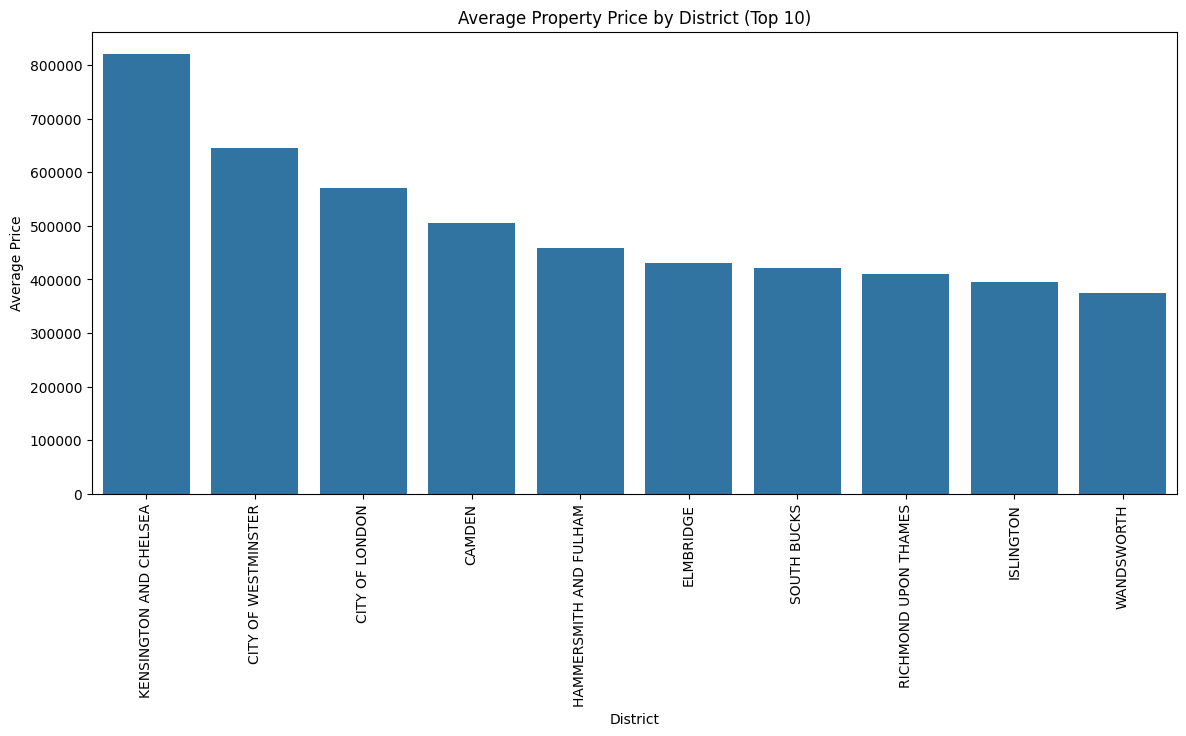

In [3]:
# Calculate average price per district
district_price = df.groupby('district')['price'].mean().sort_values(ascending=False).head(10)  # Top 10 districts

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=district_price.index, y=district_price.values)
plt.title('Average Property Price by District (Top 10)')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

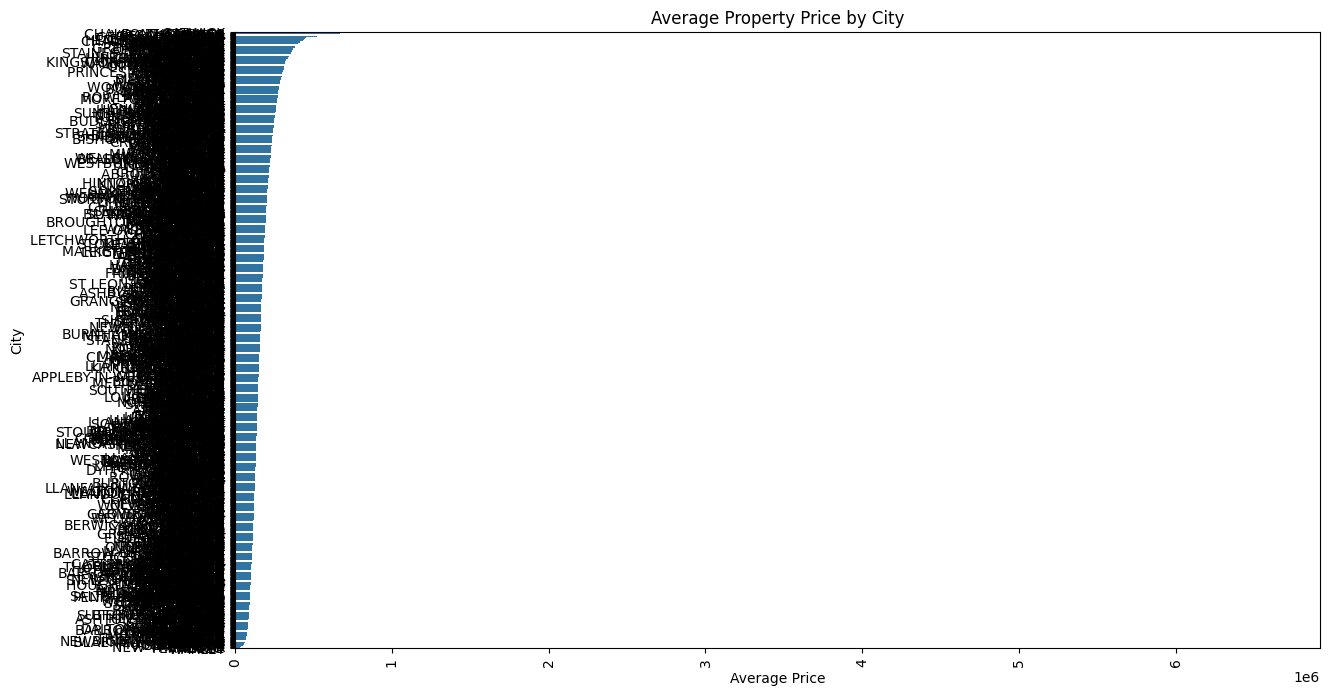

In [4]:
# Calculate average price per city
city_price = df.groupby('city')['price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x=city_price.values, y=city_price.index)
plt.title('Average Property Price by City')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.xticks(rotation=90)
plt.show()